# Regression

## Predicting Housing prices

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#import data
df=pd.read_csv('kc_house_data.csv')
df=df[df['bedrooms']<11]
pd.set_option('display.max_columns',100)

## Exploratory Data Analysis

In [3]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
df.sample(5)

id             date     price  bedrooms  bathrooms  \
11846  2473370890  20140915T000000  289000.0         4       2.25   
11707  3585220340  20140811T000000  402000.0         4       1.75   
3134   7663700261  20141008T000000  395000.0         4       1.75   
14026  3343901961  20150331T000000  255000.0         3       1.00   
20315  1115600130  20140930T000000  415000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11846         1930      8925     1.0           0     0          4      8   
11707         1640     10500     1.0           0     0          4      7   
3134          1960      7945     1.0           0     0          4      7   
14026         1430     12420     1.0           0     0          3      7   
20315         2891      6499     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11846        1930              0      1974             0    98058  47.4501   
11707        1010            630      1968             0    98052  47.6933   
3134          980            980      1946             0    98125  47.7326   
14026        1430              0      1964             0    98056  47.5116   
20315        2891              0      2014             0    98001  47.3359   

          long  sqft_living15  sqft_lot15  
11846 -122.128           1930        8400  
11707 -122.116           1680        7650  
3134  -122.291           1290        7945  
14026 -122.191           1900       10350  
20315 -122.257           2550        8383

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  int64  
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [6]:
#statistics
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161100e+04  2.161100e+04  21611.000000  21611.000000  21611.000000   
mean   4.580532e+09  5.400844e+05      3.369118      2.114733   2079.878442   
std    2.876597e+09  3.671435e+05      0.906518      0.770171    918.456742   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.217250e+05      3.000000      1.750000   1426.000000   
50%    3.904931e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     10.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161100e+04  21611.000000  21611.000000  21611.000000  21611.000000   
mean   1.510786e+04      1.494308      0.007542      0.234325      3.409375   
std    4.142232e+04      0.539992      0.086521      0.766350      0.650677   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068850e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21611.000000  21611.000000   21611.000000  21611.000000  21611.000000   
mean       7.656934   1788.397020     291.481421   1971.008699     84.317570   
std        1.175496    828.103196     442.586196     29.372103    401.486212   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21611.000000  21611.000000  21611.000000   21611.000000   21611.000000  
mean   98077.937347     47.560047   -122.213884    1986.609088   12769.190320  
std       53.506890      0.138567      0.140829     685.397631   27305.336262  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.470950   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.500000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
#correlation
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016756  0.002845   0.005196    -0.012231 -0.132132   
price         -0.016756  1.000000  0.315983   0.525166     0.702066  0.089663   
bedrooms       0.002845  0.315983  1.000000   0.529594     0.592060  0.032956   
bathrooms      0.005196  0.525166  0.529594   1.000000     0.754650  0.087751   
sqft_living   -0.012231  0.702066  0.592060   0.754650     1.000000  0.172837   
sqft_lot      -0.132132  0.089663  0.032956   0.087751     0.172837  1.000000   
floors         0.018537  0.256818  0.181020   0.500621     0.353909 -0.005200   
waterfront    -0.002728  0.266371 -0.006588   0.063749     0.103823  0.021602   
view           0.011568  0.397299  0.082183   0.187754     0.284628  0.074704   
condition     -0.023730  0.036335  0.025765  -0.124918    -0.058677 -0.008942   
grade          0.008086  0.667451  0.367323   0.665033     0.762751  0.113611   
sqft_above    -0.010841  0.605601  0.491122   0.685329     0.876594  0.183518   
sqft_basement -0.005097  0.323817  0.309729   0.283763     0.435048  0.015301   
yr_built       0.021273  0.054022  0.160143   0.506162     0.318152  0.053057   
yr_renovated  -0.016708  0.126515  0.017802   0.050509     0.055168  0.007699   
zipcode       -0.008185 -0.053208 -0.157555  -0.203894    -0.199452 -0.129566   
lat           -0.001860  0.306998 -0.010547   0.024596     0.052555 -0.085676   
long           0.020723  0.021635  0.134518   0.223097     0.240270  0.229511   
sqft_living15 -0.002972  0.585412  0.403613   0.568699     0.756486  0.144595   
sqft_lot15    -0.138827  0.082451  0.030564   0.087188     0.183298  0.718555   

                 floors  waterfront      view  condition     grade  \
id             0.018537   -0.002728  0.011568  -0.023730  0.008086   
price          0.256818    0.266371  0.397299   0.036335  0.667451   
bedrooms       0.181020   -0.006588  0.082183   0.025765  0.367323   
bathrooms      0.500621    0.063749  0.187754  -0.124918  0.665033   
sqft_living    0.353909    0.103823  0.284628  -0.058677  0.762751   
sqft_lot      -0.005200    0.021602  0.074704  -0.008942  0.113611   
floors         1.000000    0.023699  0.029445  -0.263686  0.458208   
waterfront     0.023699    1.000000  0.401857   0.016663  0.082772   
view           0.029445    0.401857  1.000000   0.046022  0.251309   
condition     -0.263686    0.016663  0.046022   1.000000 -0.144650   
grade          0.458208    0.082772  0.251309  -0.144650  1.000000   
sqft_above     0.523852    0.072076  0.167653  -0.158118  0.755953   
sqft_basement -0.245722    0.080595  0.276973   0.174081  0.168433   
yr_built       0.489427   -0.026174 -0.053482  -0.361463  0.446942   
yr_renovated   0.006126    0.092952  0.104037  -0.060496  0.014540   
zipcode       -0.059127    0.030289  0.084842   0.002988 -0.184841   
lat            0.049657   -0.014270  0.006170  -0.015049  0.114111   
long           0.125440   -0.041920 -0.078430  -0.106457  0.198334   
sqft_living15  0.279902    0.086459  0.280425  -0.092757  0.713193   
sqft_lot15    -0.011270    0.030701  0.072567  -0.003381  0.119235   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010841      -0.005097  0.021273     -0.016708 -0.008185   
price            0.605601       0.323817  0.054022      0.126515 -0.053208   
bedrooms         0.491122       0.309729  0.160143      0.017802 -0.157555   
bathrooms        0.685329       0.283763  0.506162      0.050509 -0.203894   
sqft_living      0.876594       0.435048  0.318152      0.055168 -0.199452   
sqft_lot         0.183518       0.015301  0.053057      0.007699 -0.129566   
floors           0.523852      -0.245722  0.489427      0.006126 -0.059127   
waterfront       0.072076       0.080595 -0.026174      0.092952  0.030289   
view             0.167653       0.276973 -0.053482      0.104037  0.084842   
condition       -0.158118       0.174081 -0.361463     -0.060496  0.

In [8]:
#P-value p<0.05 there is correlation, p-value>0.05 no correlation

In [9]:
df.shape

(21611, 21)

In [10]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 10], dtype=int64)

In [11]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
Name: bedrooms, dtype: int64

In [12]:
df['bedrooms'].value_counts(normalize=True)

3     0.454583
4     0.318449
2     0.127713
5     0.074083
6     0.012586
1     0.009208
7     0.001758
0     0.000602
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64

In [13]:
import seaborn as sns

[Text(0, 0, '13'),
 Text(0, 0, '199'),
 Text(0, 0, '2760'),
 Text(0, 0, '9824'),
 Text(0, 0, '6882'),
 Text(0, 0, '1601'),
 Text(0, 0, '272'),
 Text(0, 0, '38'),
 Text(0, 0, '13'),
 Text(0, 0, '6'),
 Text(0, 0, '3')]

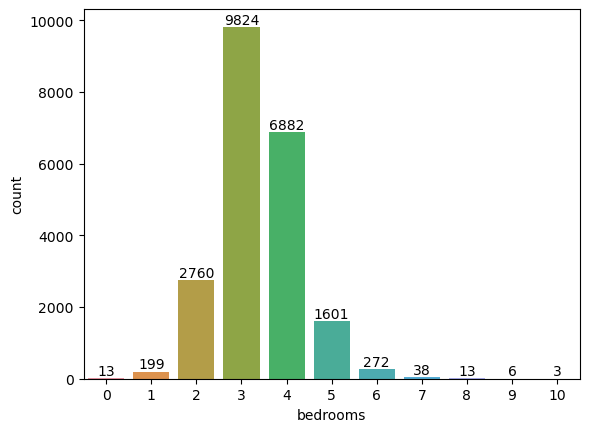

In [14]:
ax=sns.countplot(x=df['bedrooms'])
ax.bar_label(ax.containers[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '0.75'),
  Text(3, 0, '1.0'),
  Text(4, 0, '1.25'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.75'),
  Text(7, 0, '2.0'),
  Text(8, 0, '2.25'),
  Text(9, 0, '2.5'),
  Text(10, 0, '2.75'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.25'),
  Text(13, 0, '3.5'),
  Text(14, 0, '3.75'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.25'),
  Text(17, 0, '4.5'),
  Text(18, 0, '4.75'),
  Text(19, 0, '5.0'),
  Text(20, 0, '5.25'),
  Text(21, 0, '5.5'),
  Text(22, 0, '5.75'),
  Text(23, 0, '6.0'),
  Text(24, 0, '6.25'),
  Text(25, 0, '6.5'),
  Text(26, 0, '6.75'),
  Text(27, 0, '7.5'),
  Text(28, 0, '7.75'),
  Text(29, 0, '8.0')])

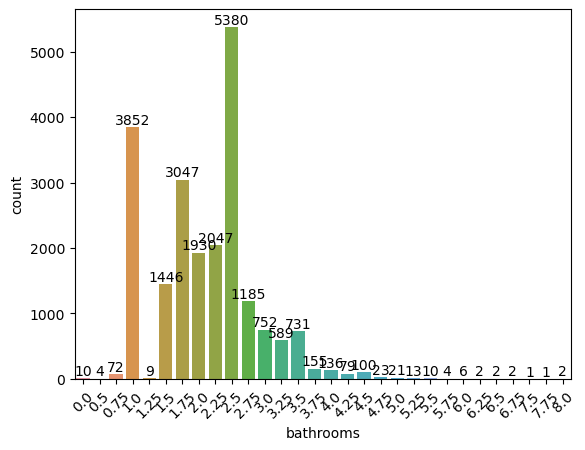

In [15]:
ax=sns.countplot(x=df['bathrooms'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

<AxesSubplot:>

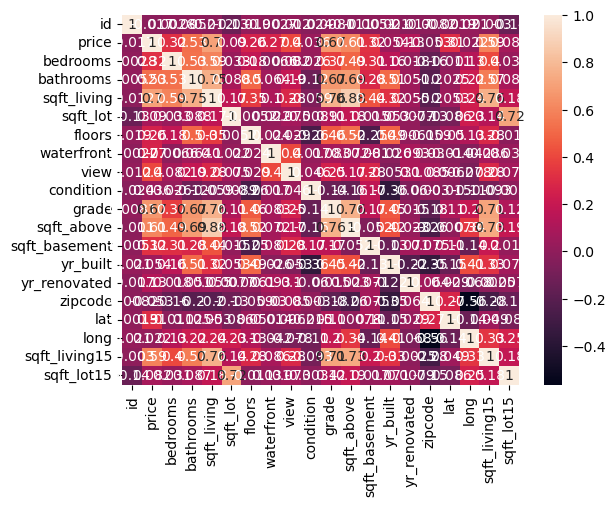

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702066
grade            0.667451
sqft_above       0.605601
sqft_living15    0.585412
bathrooms        0.525166
view             0.397299
sqft_basement    0.323817
bedrooms         0.315983
lat              0.306998
waterfront       0.266371
floors           0.256818
yr_renovated     0.126515
sqft_lot         0.089663
sqft_lot15       0.082451
yr_built         0.054022
zipcode          0.053208
condition        0.036335
long             0.021635
id               0.016756
Name: price, dtype: float64

In [18]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

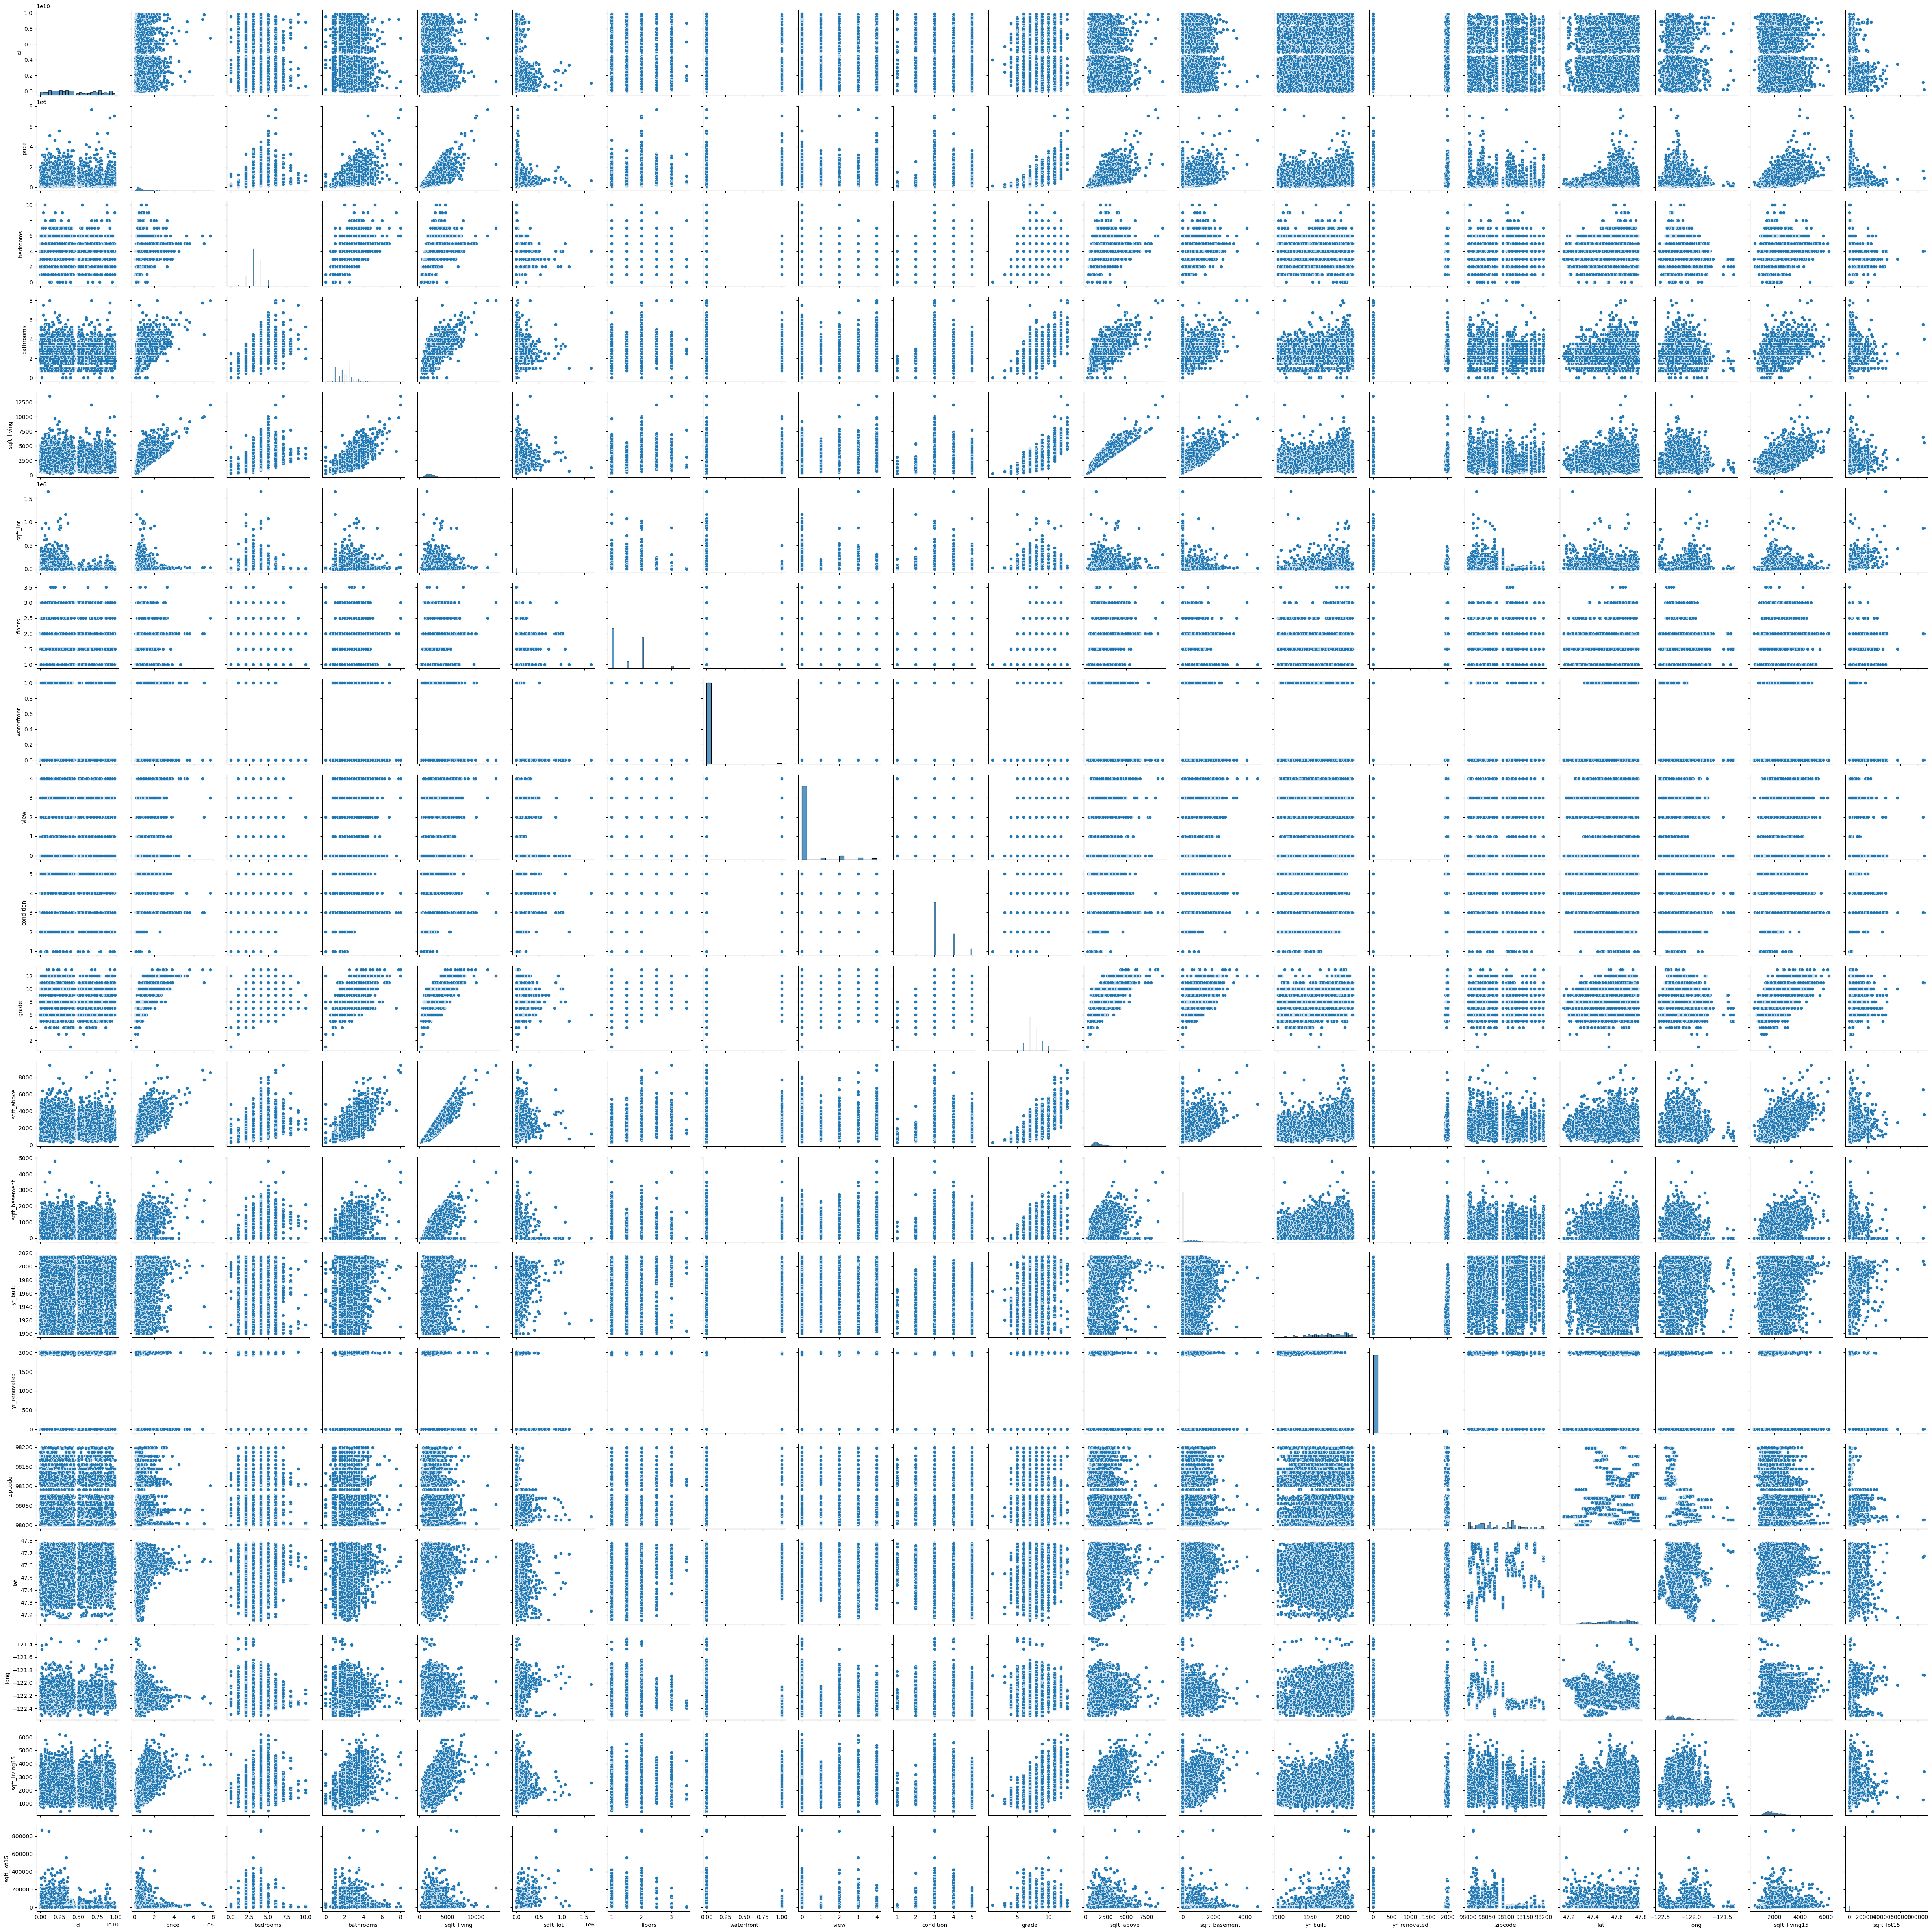

In [19]:
sns.pairplot(df)

# Modelling

In [20]:
abs(df.corr()['price']).sort_values(ascending=False)
#include columns that correlatio is above 0.20 and below 0.90

price            1.000000
sqft_living      0.702066
grade            0.667451
sqft_above       0.605601
sqft_living15    0.585412
bathrooms        0.525166
view             0.397299
sqft_basement    0.323817
bedrooms         0.315983
lat              0.306998
waterfront       0.266371
floors           0.256818
yr_renovated     0.126515
sqft_lot         0.089663
sqft_lot15       0.082451
yr_built         0.054022
zipcode          0.053208
condition        0.036335
long             0.021635
id               0.016756
Name: price, dtype: float64

In [21]:
x=df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view',
      'sqft_basement','bedrooms','lat','waterfront','floors']]
y=df[['price']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [24]:
X_train.shape

(17288, 11)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
model=lr.fit(X_train,y_train)

In [28]:
pred=model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
mean_squared_error(y_test, pred)**0.5

220682.4035235634

In [31]:
r2_score(y_test,pred)

0.6629904264680478

In [32]:
x=df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view',
      'sqft_basement','bedrooms','lat','waterfront','floors','zipcode']]
y=df[['price']]

In [33]:
x.head()

sqft_living  grade  sqft_above  sqft_living15  bathrooms  view  \
0         1180      7        1180           1340       1.00     0   
1         2570      7        2170           1690       2.25     0   
2          770      6         770           2720       1.00     0   
3         1960      7        1050           1360       3.00     0   
4         1680      8        1680           1800       2.00     0   

   sqft_basement  bedrooms      lat  waterfront  floors  zipcode  
0              0         3  47.5112           0     1.0    98178  
1            400         3  47.7210           0     2.0    98125  
2              0         2  47.7379           0     1.0    98028  
3            910         4  47.5208           0     1.0    98136  
4              0         3  47.6168           0     1.0    98074

In [34]:
x=pd.get_dummies(x,drop_first=True)

In [35]:
x.head()

sqft_living  grade  sqft_above  sqft_living15  bathrooms  view  \
0         1180      7        1180           1340       1.00     0   
1         2570      7        2170           1690       2.25     0   
2          770      6         770           2720       1.00     0   
3         1960      7        1050           1360       3.00     0   
4         1680      8        1680           1800       2.00     0   

   sqft_basement  bedrooms      lat  waterfront  floors  zipcode  
0              0         3  47.5112           0     1.0    98178  
1            400         3  47.7210           0     2.0    98125  
2              0         2  47.7379           0     1.0    98028  
3            910         4  47.5208           0     1.0    98136  
4              0         3  47.6168           0     1.0    98074

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [37]:
model=lr.fit(X_train,y_train)

In [38]:
pred=model.predict(X_test)

In [39]:
r2_score(y_test,pred)

0.6629578996666315

In [40]:
from sklearn.linear_model import Ridge, Lasso

In [41]:
R=Ridge()
L=Lasso()

In [42]:
R.fit(X_train,y_train)

Ridge()

In [43]:
pred2=R.predict(X_test)

In [44]:
r2_score(y_test,pred2)

0.662933924067133

In [45]:
L.fit(X_train,y_train)

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.077e+13, tolerance: 2.288e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [46]:
pred3=L.predict(X_test)

In [47]:
r2_score(y_test,pred3)

0.6629571002058947

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [49]:
algo_test(x,y)

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.128e+14, tolerance: 2.301e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.069e+13, tolerance: 2.301e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R_Squared           RMSE            MAE
XGradientBooting    0.865859  137827.377564   73876.825993
Gradient Boosting   0.864387  138581.666559   84238.168859
Lasso               0.650826  222369.500089  136018.070797
Linear              0.650826  222369.554387  136018.287867
Ridge               0.650814  222373.331051  136015.292124
Extra Tree          0.637723  226503.598386  116884.455239
ElasticNet          0.575841  245086.253769  155186.270302